<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Methods/blob/main/3.%20Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name: Mohammad Hadi Pahlevani
- Name: Spandan Bhattacharya

Import modules and anything else you need

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import builtins

## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by: $$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`) $$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [ ]:
def f(x):
    return x**2 * np.exp(-x**2)

def abs_error(numerical_value, actual_value):
    return abs(numerical_value - actual_value)




Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

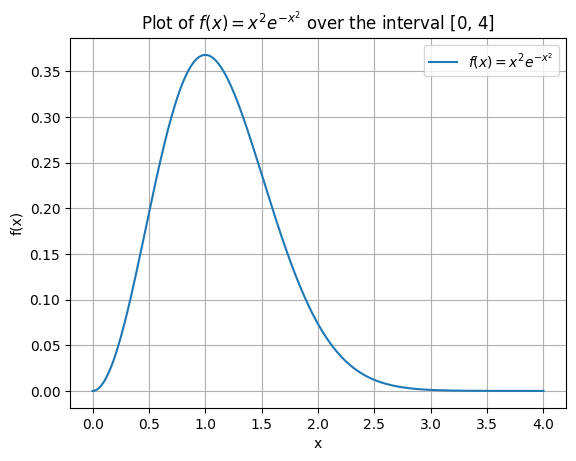

In [ ]:
# Create an array of x values over the interval [0, 4]
x_values = np.linspace(0, 4, 400)

# Compute the corresponding y values
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label=r'$f(x) = x^2 e^{-x^2}$')

# Label the axes
plt.xlabel('x')
plt.ylabel('f(x)')

# Add a title to the plot
plt.title('Plot of $f(x) = x^2 e^{-x^2}$ over the interval [0, 4]')

# Show a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [ ]:
# Function to integrate
def f(x):
    return x**2 * np.exp(-x**2)

# Left Riemann Sum
def left_riemann(f, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(n):
        x = a + i * h
        result += f(x)
    return result * h

# Right Riemann Sum
def right_riemann(f, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(1, n + 1):
        x = a + i * h
        result += f(x)
    return result * h

# Midpoint Riemann Sum
def midpoint_riemann(f, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(n):
        x = a + (i + 0.5) * h
        result += f(x)
    return result * h

# Trapezoidal Rule
def trapezoidal(f, a, b, n):
    h = (b - a) / n
    result = (f(a) + f(b)) / 2
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

# Simpson's Rule
def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")

    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i * h)
    for i in range(2, n - 1, 2):
        result += 2 * f(a + i * h)
    return result * h / 3


a = 0  # Lower bound of integration
b = 2  # Upper bound of integration
n = 100  # Number of subintervals

print("Left Riemann Sum:", left_riemann(f, a, b, n))
print("Right Riemann Sum:", right_riemann(f, a, b, n))
print("Midpoint Riemann Sum:", midpoint_riemann(f, a, b, n))
print("Trapezoidal Rule:", trapezoidal(f, a, b, n))
print("Simpson's Rule:", simpson(f, a, b, n))




Left Riemann Sum: 0.4219851047465246
Right Riemann Sum: 0.4234503558576233
Midpoint Riemann Sum: 0.42272871956324276
Trapezoidal Rule: 0.422717730302074
Simpson's Rule: 0.42272505623137957


For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [ ]:
# Define the function to integrate
def g(x):
    return x**2 / np.exp(-x**2)

# Calculate exact integrals using quad
exact1, _ = quad(g, 0, 1)
exact2, _ = quad(g, 0, 3)

# Define intervals and number of points
c, d, e = 0, 1, 3
n = 100

print("FOR INTERVAL [0,1]")
print("Left Riemann Sum:", left_riemann(g, c, d, n))
print("Right Riemann Sum:", right_riemann(g, c, d, n))
print("Midpoint Riemann Sum:", midpoint_riemann(g, c, d, n))
print("Trapezoidal Rule:", trapezoidal(g, c, d, n))
print("Simpson's Rule:", simpson(g, c, d, n))
print()

print("FOR INTERVAL [0,3]")
print("Left Riemann Sum:", left_riemann(g, c, e, n))
print("Right Riemann Sum:", right_riemann(g, c, e, n))
print("Midpoint Riemann Sum:", midpoint_riemann(g, c, e, n))
print("Trapezoidal Rule:", trapezoidal(g, c, e, n))
print("Simpson's Rule:", simpson(g, c, e, n))
print()

# Absolute error in [0,1]
print("Absolute error in the [0,1] range:")
print("Left Riemann Sum:", builtins.abs(left_riemann(g, c, d, n) - exact1))
print("Right Riemann Sum:", builtins.abs(right_riemann(g, c, d, n) - exact1))
print("Midpoint Riemann Sum:", builtins.abs(midpoint_riemann(g, c, d, n) - exact1))
print("Trapezoidal Rule:", builtins.abs(trapezoidal(g, c, d, n) - exact1))
print("Simpson's Rule:", builtins.abs(simpson(g, c, d, n) - exact1))
print()

# Absolute error in the [0,3] range
print("Absolute error in the [0,3] range:")
print("Left Riemann Sum:", builtins.abs(left_riemann(g, c, e, n) - exact2))
print("Right Riemann Sum:", builtins.abs(right_riemann(g, c, e, n) - exact2))
print("Midpoint Riemann Sum:", builtins.abs(midpoint_riemann(g, c, e, n) - exact2))
print("Trapezoidal Rule:", builtins.abs(trapezoidal(g, c, e, n) - exact2))
print("Simpson's Rule:", builtins.abs(simpson(g, c, e, n) - exact2))


FOR INTERVAL [0,1]
Left Riemann Sum: 0.6143142389607847
Right Riemann Sum: 0.6414970572453751
Midpoint Riemann Sum: 0.6277697388250205
Trapezoidal Rule: 0.6279056481030799
Simpson's Rule: 0.6278150515423511

FOR INTERVAL [0,3]
Left Riemann Sum: 10374.873671884514
Right Riemann Sum: 12562.706332329868
Midpoint Riemann Sum: 11414.145192782076
Trapezoidal Rule: 11468.79000210719
Simpson's Rule: 11432.46162631281

Absolute error in the [0,1] range:
Left Riemann Sum: 0.013500802315147165
Right Riemann Sum: 0.013682015969443184
Midpoint Riemann Sum: 4.5302450911388625e-05
Trapezoidal Rule: 9.060682714800983e-05
Simpson's Rule: 1.0266419159243867e-08

Absolute error in the [0,3] range:
Left Riemann Sum: 1057.4796580322
Right Riemann Sum: 1130.3530024131542
Midpoint Riemann Sum: 18.20813713463758
Trapezoidal Rule: 36.43667219047529
Simpson's Rule: 0.10829639609619335


We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

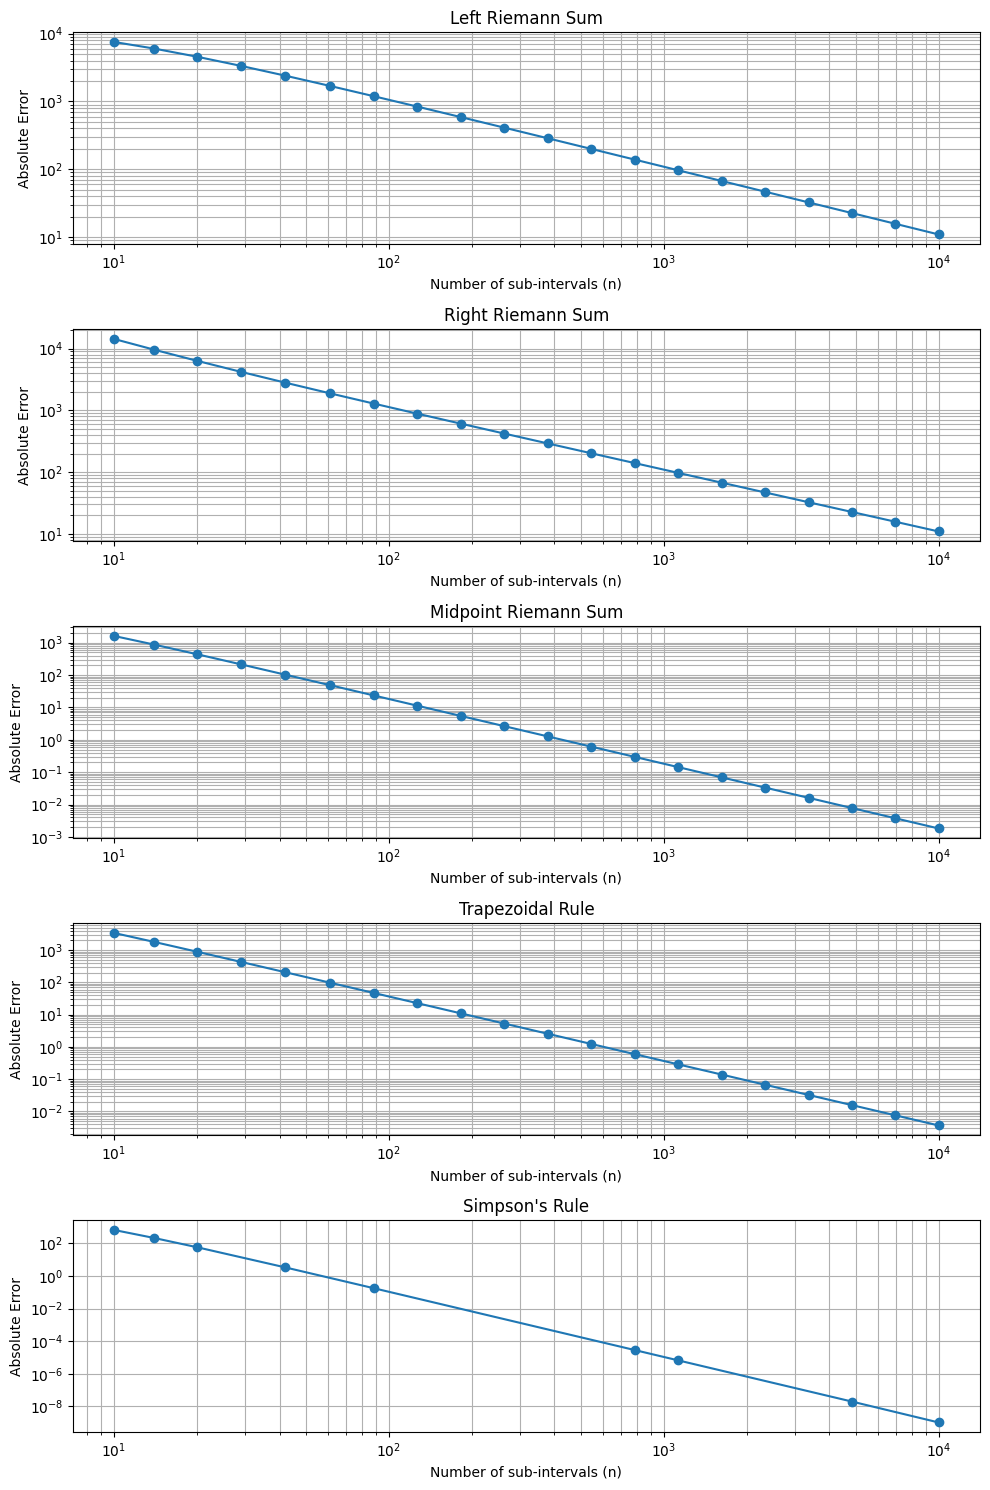

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import quad

exact_value, _ = quad(g, 0, 3)

# Range of sub-intervals
n_values = np.logspace(1, 4, num=20, dtype=int)

# Store the absolute errors for each method
errors_left = []
errors_right = []
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []

# Compute errors for each method over the range of n values
for n in n_values:
    errors_left.append(builtins.abs(left_riemann(g, 0, 3, n) - exact_value))
    errors_right.append(builtins.abs(right_riemann(g, 0, 3, n) - exact_value))
    errors_midpoint.append(builtins.abs(midpoint_riemann(g, 0, 3, n) - exact_value))
    errors_trapezoidal.append(builtins.abs(trapezoidal(g, 0, 3, n) - exact_value))
    if n % 2 == 0:  # Only even n for Simpson's rule
        errors_simpson.append(builtins.abs(simpson(g, 0, 3, n) - exact_value))

# Plot the results - individual plots
plt.figure(figsize=(10, 15))

plt.subplot(5, 1, 1)
plt.loglog(n_values, errors_left, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title('Left Riemann Sum')
plt.grid(True, which='both')

plt.subplot(5, 1, 2)
plt.loglog(n_values, errors_right, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title('Right Riemann Sum')
plt.grid(True, which='both')

plt.subplot(5, 1, 3)
plt.loglog(n_values, errors_midpoint, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title('Midpoint Riemann Sum')
plt.grid(True, which='both')

plt.subplot(5, 1, 4)
plt.loglog(n_values, errors_trapezoidal, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title('Trapezoidal Rule')
plt.grid(True, which='both')

plt.subplot(5, 1, 5)
plt.loglog(n_values[n_values % 2 == 0], errors_simpson, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title("Simpson's Rule")
plt.grid(True, which='both')

plt.tight_layout()
plt.show()


It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

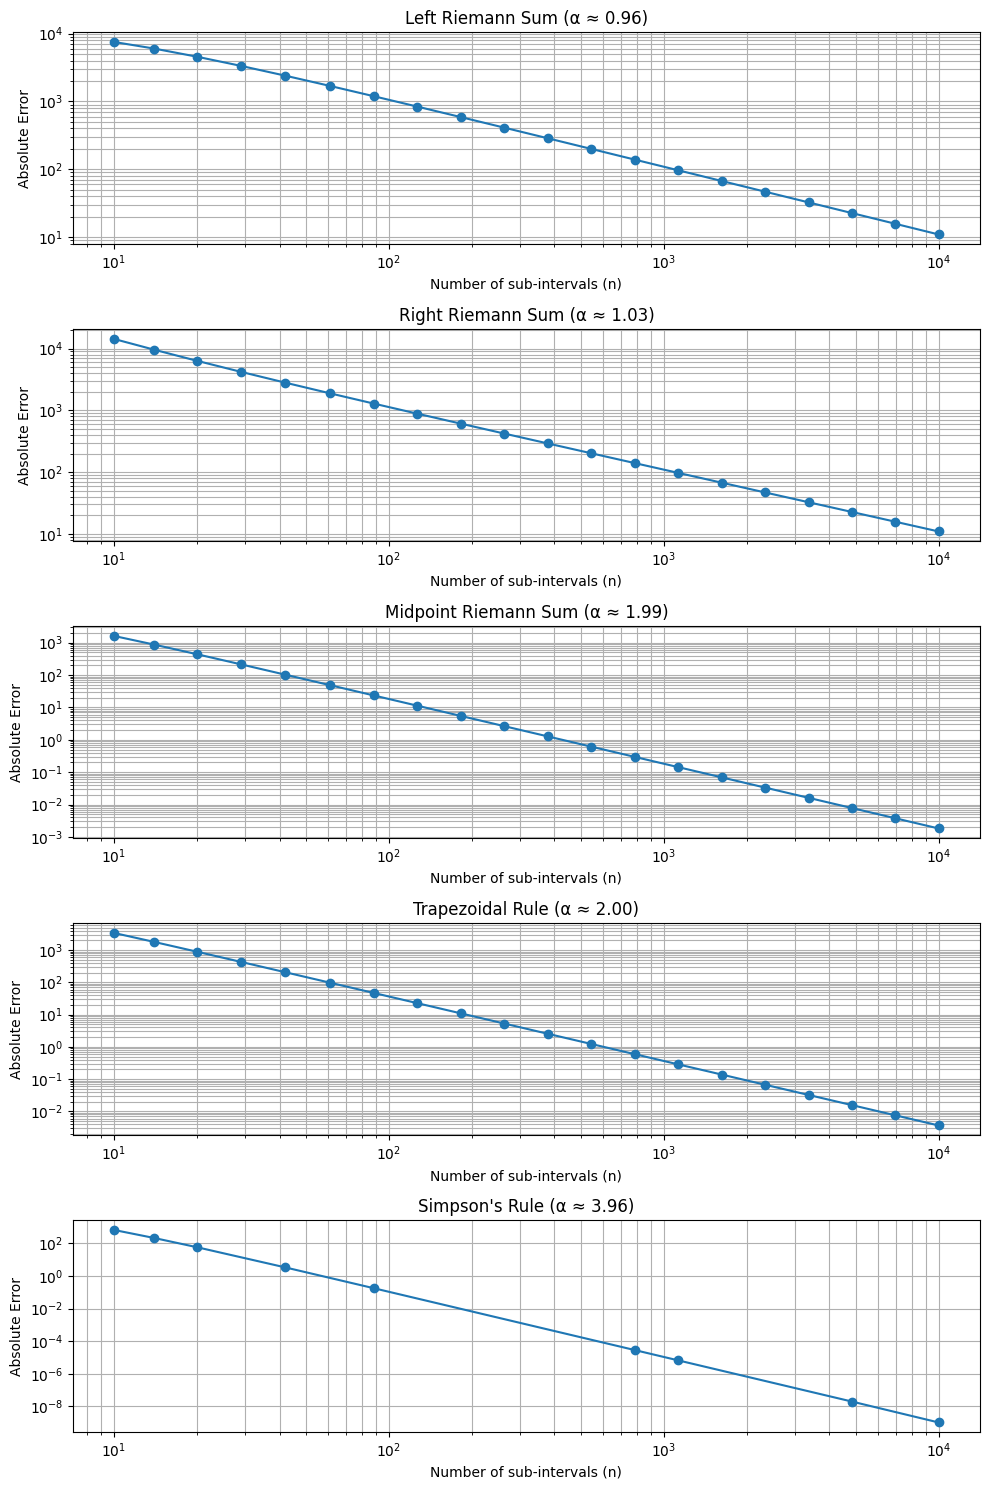

In [ ]:
from scipy.stats import linregress

exact_value, _ = quad(g, 0, 3)

# Range of sub-intervals
n_values = np.logspace(1, 4, num=20, dtype=int)

# Store the absolute errors for each method
errors_left = []
errors_right = []
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []

# Compute errors for each method over the range of n values
for n in n_values:
    errors_left.append(builtins.abs(left_riemann(g, 0, 3, n) - exact_value))
    errors_right.append(builtins.abs(right_riemann(g, 0, 3, n) - exact_value))
    errors_midpoint.append(builtins.abs(midpoint_riemann(g, 0, 3, n) - exact_value))
    errors_trapezoidal.append(builtins.abs(trapezoidal(g, 0, 3, n) - exact_value))
    if n % 2 == 0:  # Only even n for Simpson's rule
        errors_simpson.append(builtins.abs(simpson(g, 0, 3, n) - exact_value))

# Perform linear regression on log-log data to find alpha
def find_alpha(n_values, errors):
    log_n = np.log(n_values)
    log_errors = np.log(errors)
    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_errors)
    return slope  # The slope is -alpha

# Find alphas for each method
alpha_left = -find_alpha(n_values, errors_left)
alpha_right = -find_alpha(n_values, errors_right)
alpha_midpoint = -find_alpha(n_values, errors_midpoint)
alpha_trapezoidal = -find_alpha(n_values, errors_trapezoidal)
alpha_simpson = -find_alpha(n_values[n_values % 2 == 0], errors_simpson)

# Plot the results and annotate alpha
plt.figure(figsize=(10, 15))

plt.subplot(5, 1, 1)
plt.loglog(n_values, errors_left, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title(f'Left Riemann Sum (α ≈ {alpha_left:.2f})')
plt.grid(True, which='both')

plt.subplot(5, 1, 2)
plt.loglog(n_values, errors_right, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title(f'Right Riemann Sum (α ≈ {alpha_right:.2f})')
plt.grid(True, which='both')

plt.subplot(5, 1, 3)
plt.loglog(n_values, errors_midpoint, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title(f'Midpoint Riemann Sum (α ≈ {alpha_midpoint:.2f})')
plt.grid(True, which='both')

plt.subplot(5, 1, 4)
plt.loglog(n_values, errors_trapezoidal, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title(f'Trapezoidal Rule (α ≈ {alpha_trapezoidal:.2f})')
plt.grid(True, which='both')

plt.subplot(5, 1, 5)
plt.loglog(n_values[n_values % 2 == 0], errors_simpson, marker='o')
plt.xlabel('Number of sub-intervals (n)')
plt.ylabel('Absolute Error')
plt.title(f"Simpson's Rule (α ≈ {alpha_simpson:.2f})")
plt.grid(True, which='both')

plt.tight_layout()
plt.show()


*COMMENTS:*

Riemann Sums (Left and Right): Typically, these methods have lower convergence rates, showing
𝛼
≈
0.96 and
α≈1.03, meaning the error decreases linearly as
𝑛 increases.

Midpoint Rule: This is generally more accurate than the basic Riemann sums and often has 𝛼≈1.99, this is because the error term is inversely proportional to n^2.

Trapezoidal Rule: The error term is again inversely proportional to n^2, and our value for α is around 2.00

Simpson Rule: Theoretically, in this case, the error term is inversely proportional to n^4, showing that is method is capable of achieving high accuracy with fewer intervals as compared to other methods of lower-order convergence rates.

## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$
- study the dependence of the absolute error on the number of samples.

Define the function $f(x)$ and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [ ]:
def h(x):
    return x**2

def montecarlo(h, a, b, n):
    """f is function to integrate over the interval [a,b] with n random points"""
    x_random = np.random.uniform(a, b, n)
    f_values = h(x_random)
    I = (b - a) * np.mean(f_values)

    return I


Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [ ]:
monte = montecarlo (h,-2,2,1000)
print("Result using monte carlo: ",monte)
quad_result, quad_error = quad(h, -2, 2)
error = monte - quad_result
print("Absolute error: ",builtins.abs(error))
print()
print("Result using mid point rule:",)
print("Midpoint Riemann Sum:", midpoint_riemann(h, -2, 2, 1000))
print("Absolute error:", builtins.abs(left_riemann(h, -2, 2, 1000) - quad_result))

print("precision result:",quad_result)


Result using monte carlo:  5.409678468246376
Absolute error:  0.07634513491304329

Result using mid point rule:
Midpoint Riemann Sum: 5.333328000000002
Absolute error: 1.0666666664604918e-05
precision result: 5.333333333333333


COMMENTS:


*   The absolute error in the case of Monte Carlo method is much more significant because this method uses random sampling. We can perhaps reduce the absolute error by taking a larger N sample
*   In our Riemann Method, the absolute error is the order of 10^(-5). This  shows that for a fixed sample of N, this method yields a better result.



Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment.

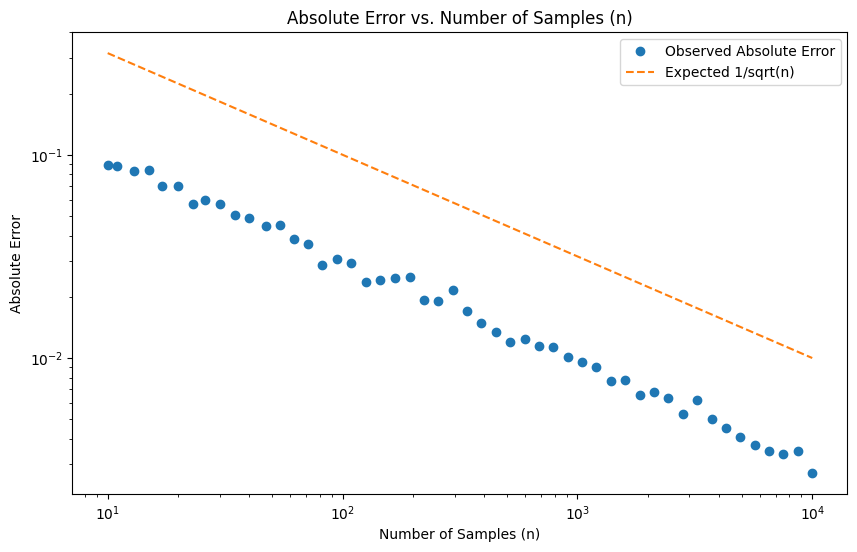

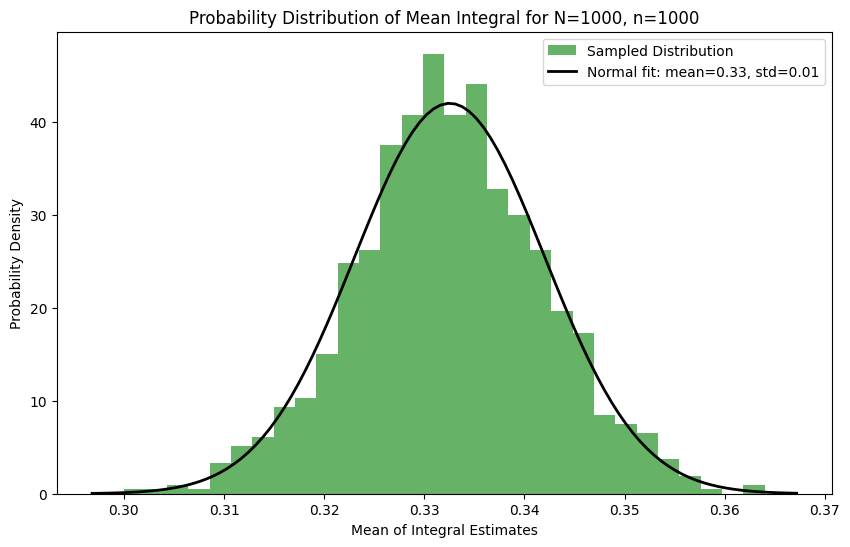

In [ ]:
from scipy.stats import norm

def h(x):
    return x**2
a, b = 0, 1
N_trials = 100  # Number of trials to calculate mean integral
n_values = np.logspace(1, 4, num=50, dtype=int)  # n from 10 to 10,000 (logarithmic scale)

# Arrays to store results
errors = []
mean_integrals = []

for n in n_values:
    # Calculate the integral N_trials times for each n
    integrals = np.array([montecarlo(h, a, b, n) for _ in range(N_trials)])
    mean_integral = np.mean(integrals)
    mean_integrals.append(mean_integral)
    error = np.std(integrals)  # Standard deviation as absolute error
    errors.append(error)

# Plot absolute error as a function of n
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, 'o', label="Observed Absolute Error")
plt.plot(n_values, 1/np.sqrt(n_values), label="Expected 1/sqrt(n)", linestyle="--")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Absolute Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Absolute Error vs. Number of Samples (n)")
plt.show()

# For N=1000, n=1000: Plot PDF
N = 1000
n = 1000
integral_samples = np.array([montecarlo(h, a, b, n) for _ in range(N)])
mean_integral_N = np.mean(integral_samples)

# Plot histogram and fit with a normal distribution
plt.figure(figsize=(10, 6))
plt.hist(integral_samples, bins=30, density=True, alpha=0.6, color='g', label="Sampled Distribution")
mu, std = norm.fit(integral_samples)  # Fit a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f"Normal fit: mean={mu:.2f}, std={std:.2f}")
plt.xlabel("Mean of Integral Estimates")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Probability Distribution of Mean Integral for N=1000, n=1000")
plt.show()


# COMMENTS ON FIRST PLOT



*   The first plot shows the absolute error in the Monte Carlo integration as a function of the number of samples, n, on a log-log scale.
*   The observed absolute error matches with our theoretical trend of error being inversely proportional to sqrt(N).


*   The result confirms that as we increase n, we obtain a more accurate approximation of the integral, and the error decreases at a predictable rate.


# COMMENTS ON THE SECOND PLOT



*   The second plot shows the probability distribution of integral estimates calculated over 1000 trials with 𝑛=1000 random samples per trial.
*   The histogram of these integral estimates forms a bell-shaped curve, which suggests that the distribution of the integral estimates approximates a normal distribution.

*   We fitted this data with a normal distribution (black curve) with calculated mean and standard deviation values. This fit shows that the integral estimates are centered around a mean close to the true integral value, with a predictable spread (standard deviation).
*   CONCLUSION:






